In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from keras.layers import Input, Dense
from keras import regularizers

In [3]:
df = pd.read_csv('DSA_features.csv')

In [5]:
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [6]:
df.isnull().values.any()

False

In [7]:
normal_data = df[df['activity'].isin(['lyingRight', 'lyingBack'])]
abnormal_data = df[df['activity'] == 'sitting']
test_data = pd.concat([normal_data, abnormal_data])

In [8]:
X = test_data.drop(columns=['activity', 'people']).values

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
def add_noise_to_column(df, column_name, noise_factor=0.5):
    num = df.shape[0]
    df[column_name] = df[column_name] + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=num)
    return df

In [11]:
noise_factor = 0.5 

In [12]:
columns = test_data.drop(columns=['activity', 'people']).columns


In [13]:
for column in columns:
    test_data = add_noise_to_column(test_data, column, noise_factor)

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(test_data.drop(columns=['activity', 'people']))

In [60]:
X_noisy = X_scaled

X_clean = X_scaled

In [61]:
input_dim = X_clean.shape[1]

In [67]:
encoding_dim = 512

encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

In [68]:
from keras.optimizers import Adam
#encoded = Dense(encoding_dim, activation='relu')(input_layer)
#decoded = Dense(input_dim, activation='sigmoid')(encoded)
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


In [69]:
autoencoder.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 270)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 512)            │       138,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 32)             │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 270)            │         8,910 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165,134 (645.05 KB)

 Trainable params: 165,134 (645.05 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
autoencoder.fit(X_noisy, X_clean, 
                epochs=100,
                batch_size=128,
                validation_split=0.2)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8359 - val_loss: 0.9973
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8336 - val_loss: 0.9972
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8447 - val_loss: 0.9975
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8416 - val_loss: 0.9973
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8498 - val_loss: 0.9972
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8386 - val_loss: 0.9974
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8281 - val_loss: 0.9978
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8508 - val_loss: 0.9973
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8480 - val_loss: 0.9976
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8395 - val_loss: 0.9966
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8446 - val_loss: 0.9972
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8448 - val_loss: 0.9969


In [79]:
X_pred = autoencoder.predict(X_noisy)

mse = np.mean(np.square(X_clean - X_pred))
print(f"Mean Squared Error (복원 오차): {mse}")

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step
Mean Squared Error (복원 오차): 0.8708279743613273


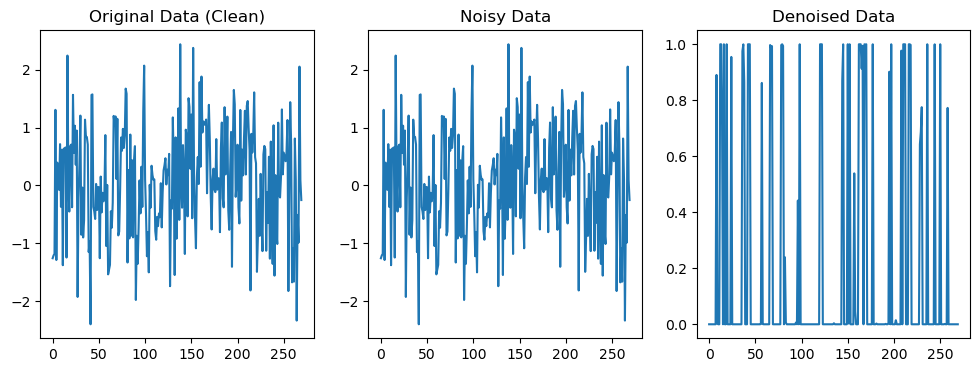

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(X_clean[0])
plt.title('Original Data (Clean)')
plt.subplot(1, 3, 2)
plt.plot(X_noisy[0])
plt.title('Noisy Data')
plt.subplot(1, 3, 3)
plt.plot(X_pred[0])
plt.title('Denoised Data')
plt.show()